# Implementierung eines Künstlichen Neuronalen Netzes (KNN) zum MNIST-Dataset




Forschertag 06.06.2024


## Block 1: Definition der Klasse für das Neuronale Netz und Model instantiieren

In [1]:
# Version 1.0
# Block 1
import torch
import torch.nn as nn

# Definiere das neuronale Netzwerk
class SimpleNN(nn.Module):  # erbt von nn.Module
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) # fc1 = fully connected layer, 28x28=784 in, 128 out
        self.relu = nn.ReLU()            # Rectified Linear Unit (gerichtetes lineares Element)
                                         # f(x) = max(0, x)
        self.fc2 = nn.Linear(128, 10)    # 128 in, 10 out

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flattening der Eingabe
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model für das Neuronales Netz instantiieren
mnist_neural_network = SimpleNN()

In [2]:
# Selber programmieren nach Block 1
print(mnist_neural_network)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)



## Block 2: Daten herunterladen und vorbereiten


In [3]:
# Block 2:
from torchvision import transforms
from torch.utils.data import DataLoader

# Lade das MNIST-Dataset und wende Transformationen an
transform_function = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

from torchvision import datasets

training_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform_function)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform_function)

training_loader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)
# Dataloader for training because of batches and shuffeling

100%|██████████| 9.91M/9.91M [00:00<00:00, 128MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 27.5MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 104MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.39MB/s]


In [ ]:
# Selber programmieren nach Block 2
print(transform_function)
print(training_data[0])
print(len(training_loader)*64)

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)
(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, 


## Block 3: Verlustfunktion und Algorithmus für Backpropagation definieren

In [8]:
# Block 3
import torch.optim as optim

# Verlustfunktion (Loss) und Optimierer definieren
loss_function = nn.CrossEntropyLoss()
optimization_algorithm = optim.SGD(mnist_neural_network.parameters(), lr=0.01)
    # SGD = stochastic gradient descent, lr = learning rate

# Variable zum Zählen der Anzahl der Trainingsepochen
num_epochs = 0

In [ ]:
# Selber programmieren nach Block 3



## Block 4: KNN trainieren

In [5]:
# Block 4
# Trainingsloop

num_epochs += 1
print("Starte Training der " + str(num_epochs) + ". Epoche")
for batch_index, (batch_images, batch_labels) in enumerate(training_loader):
    optimization_algorithm.zero_grad()
    batch_outputs = mnist_neural_network(batch_images) # forward wird aufgerufen, wenn data durch das Model geleitet wird
            # outputs = Wahrscheinlichkeitsverteilungen für jeweils alle 10 Ziffern
    loss = loss_function(batch_outputs, batch_labels)
    loss.backward()
    optimization_algorithm.step()

    if batch_index % 100 == 0:
        print(f'Batch {batch_index}/{len(training_loader)}, Loss: {loss.item()}')
print("Training der " + str(num_epochs) + ". Epoche fertig!")

Starte Training der 1. Epoche
Batch 0/938, Loss: 2.3580164909362793
Batch 100/938, Loss: 1.5032453536987305
Batch 200/938, Loss: 0.9823710918426514
Batch 300/938, Loss: 0.7070427536964417
Batch 400/938, Loss: 0.6724991798400879
Batch 500/938, Loss: 0.48354095220565796
Batch 600/938, Loss: 0.36899900436401367
Batch 700/938, Loss: 0.40980783104896545
Batch 800/938, Loss: 0.6849135160446167
Batch 900/938, Loss: 0.4116184711456299
Training der 1. Epoche fertig!


In [6]:
# Selber programmieren nach Block 4
print(len(batch_labels))
print(len(batch_outputs))

print(batch_labels[31].item())

32
32
8



## Block 5: Accuracy mit Testdatensatz berechnen

In [9]:
# Block 5
# Evaluierung auf dem Testdatensatz
mnist_neural_network.eval()
correct = 0

with torch.no_grad():
    for image, label in test_data:
        outputs = mnist_neural_network(image)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == label).sum().item()

accuracy = correct / len(test_data)
print(f'Genauigkeit auf dem Testdatensatz: {accuracy * 100:.2f}% nach {num_epochs} Epoche(n)')

Genauigkeit auf dem Testdatensatz: 89.46% nach 0 Epoche(n)


In [ ]:
# Selber programmieren nach Block 6



## Block 6: Zufälliges Bild wählen und erkennen

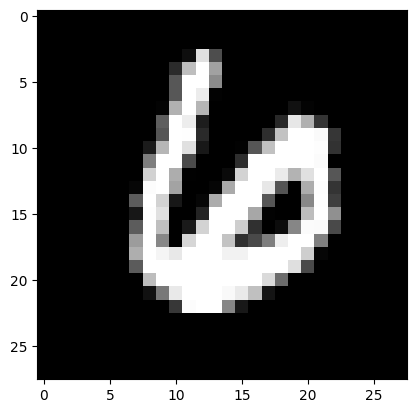


 Das neuronale Netzwerk erkennt: 6, tatsächliches Label: 6


In [10]:
# Block 6
import matplotlib.pyplot as plt
import random

random_index = random.randint(0, len(test_data) - 1)
random_image, random_label = test_data[random_index]

plt.imshow(random_image[0], cmap='gray')
plt.show()

# Vorhersage für das zufällige Bild
mnist_neural_network.eval()
with torch.no_grad():
    output = mnist_neural_network(random_image.view(-1, 28*28))
    _, predicted = torch.max(output, 1)

print("\n", f'Das neuronale Netzwerk erkennt: {predicted.item()}, tatsächliches Label: {random_label}')



In [ ]:
# Selber programmieren nach Block 6
